In [2]:
import  os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from PIL import Image,ImageFilter,ImageOps
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [3]:
#import the image data from the directory file
root_dir = "C:/Users/Nick's PC/Desktop/Pokemon/t1/"
files = os.path.join(root_dir)
print(files)
file_names = os.listdir(files)


print(file_names)

C:/Users/Nick's PC/Desktop/Pokemon/t1/
['bulbasaur', 'dratini', 'machoke', 'marowak']


In [4]:
#loop to iterate through the image data from the selected testing group

file_in = str()
datas = []
classes = []
c = 1
k = 0
r = 0
for file_name in file_names:
    r = 0
    file_in = os.path.join(root_dir, file_names[k])
    
    pics = os.listdir(file_in)
    
    #the loop converts the image into a NumPy array and flattens the array from 3d to 2d
    for pic in pics:
        state = os.path.join(file_in, pics[r])
        image = Image.open(state)
        temp = np.asarray(image)
        temp = temp.flatten()
        
        #the NumPy array is saved to a list and assined a class which is saved in a diffrent list
        datas.append(temp)
        classes.append(c)
        r +=1
     
    
    k += 1
    c += 1

print(len(datas))
#print(classes)

181


In [5]:
q = 0
new_data = []


def normalize_2d(temp):
    # Only this is changed to use 2-norm put 2 instead of 1
    norm = np.linalg.norm(datas, 1)
    # normalized matrix
    temp = datas/norm  
    temp = temp.flatten()
    new_data.append(temp)
    return new_data


for data in datas:
    temp = datas[q]
    normalized_matrix = normalize_2d(temp)
    q +=1
    

In [6]:
print(len(new_data))
print(new_data[1].shape)

181
(1158400,)


In [7]:
X = new_data
y = classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(75, 20), random_state=1)
clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(75, 20), random_state=1,solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(75, 20), random_state=1,
              solver='lbfgs')

In [8]:
y_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.31666666666666665


Text(0.5, 1.0, 'Accuracy confusion matrix')

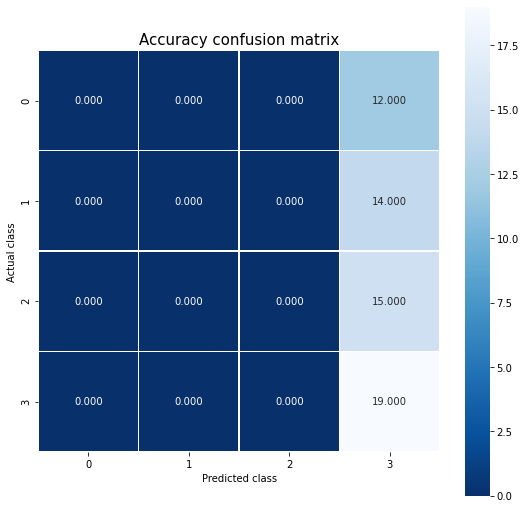

In [10]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Accuracy confusion matrix',size=15)